# Nadpis

## Run visualizations
Contains cells, with setup algoritms, which after execution show the probeh of the optimization run.

Compile and load problem definitions

In [30]:
using EO

"""simple problems"""
simple_problems = EO.setup_simple_problems() # definitions of problems g06,g08,g11,g24
"""simple solutions"""
simple_solutions = [p.solution_v for p in simple_problems]

#usage: g6 objective = simple_problems[1].objecitve, g6 constraints = simple_problems[1].constraints

"""unsimple problems"""
unsimple_problems = EO.setup_unsimple_problems() # definitions of problems g04, g05, g09 and g21.
"""unsimple solutions"""
unsimple_solutions = [p.solution_v for p in unsimple_problems];

Stochastic Ranking

top_x: Real[14.09500103174414, 0.8429630364911402]
top_f: -6961.811349478795
violations: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------
opt_x: -6961.8138755801
opt_f: [14.095, 0.8429607892154796]


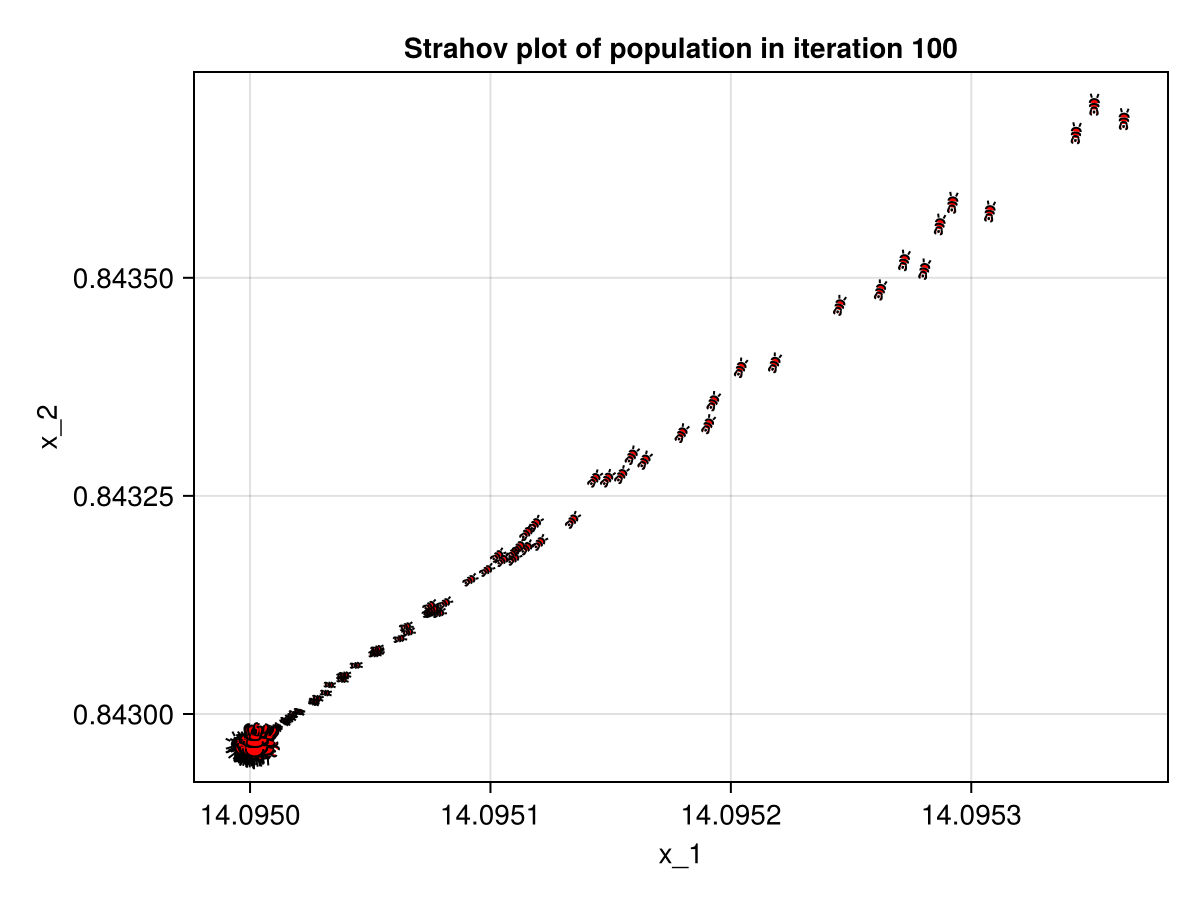

In [29]:
problem_set = simple_problems
problem_id = 1 
constraints = problem_set[problem_id].constraints
pop_size = 100
dimension = problem_set[problem_id].dimension

objective_function  = problem_set[problem_id].objective
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = enclose_arguments(EO.s_stochastic_tournament, 30, 3, constraints, 0.4)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_keep_best_n_stoch, pop_size, constraints, 0.4)
termination         = enclose_argument(iteration_termination, pop_size*100)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints=constraints)
EO.compare(solution, problem_set[problem_id])
EO.strahov_plot(solution.pop_history, 100) # can pass x_i= and y_i= to specify which two parameters of the solution should be plotted

### MOEA
Multi objective ES, where one objective dimension is the objective itself and the second objective is sum of all constraint violations.

This approach has a problem caused by the nature of the pareto front, where a solution with great objective value, but terrible constraint violation can be considered as dominating.

top_x: [14.873294457550234, 5.160754478808901]
top_f: [-3151.913598131438, 2.4922145520507115]
violations: [2.4922145520507115, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------
opt_x: -6961.8138755801
opt_f: [14.095, 0.8429607892154796]


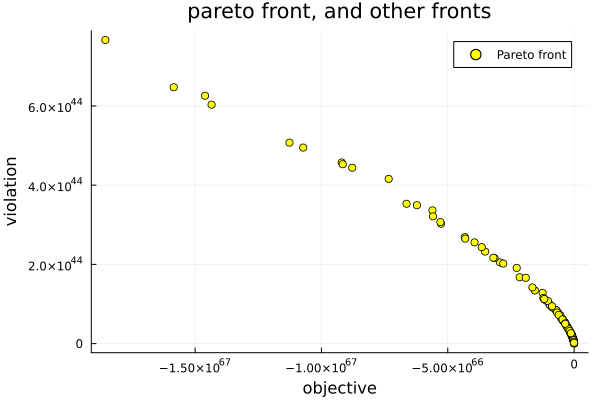

In [3]:
problem_set = simple_problems
problem_id = 1
constraints = problem_set[problem_id].constraints
pop_size = 100
dimension = problem_set[problem_id].dimension

f_pens(x::RealChromosome, constraints::Vector{EO.Constraint}) = sum(EO.Gs(x, constraints))

F = typeof(enclose_arguments(EO.f_weighted_sum, ones(dimension)))
objective_function  = EO.MultiObjFunction{F}([problem_set[problem_id].objective, enclose_arguments(f_pens, constraints)])
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = enclose_arguments(EO.s_tournament, 30, 5)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_NSGA, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*100)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
EO.compare(solution, problem_set[problem_id])
EO.plot_pareto_fronts(solution.pop_history[end])

### Adaptive penalization
The objective function is penalized by the sum of constraint violations, multiplied by rg(t) which controls the exploration exploitation tradeoff.

"here"

top_x: Real[14.094006357806991, 0.8409206891111632]
top_f: -6964.110192066525
violations: [0.0011076499024511577, 0.0008796344835531045, 0.0, 0.0, 0.0, 0.0]
--------------------------------
opt_x: -6961.8138755801
opt_f: [14.095, 0.8429607892154796]


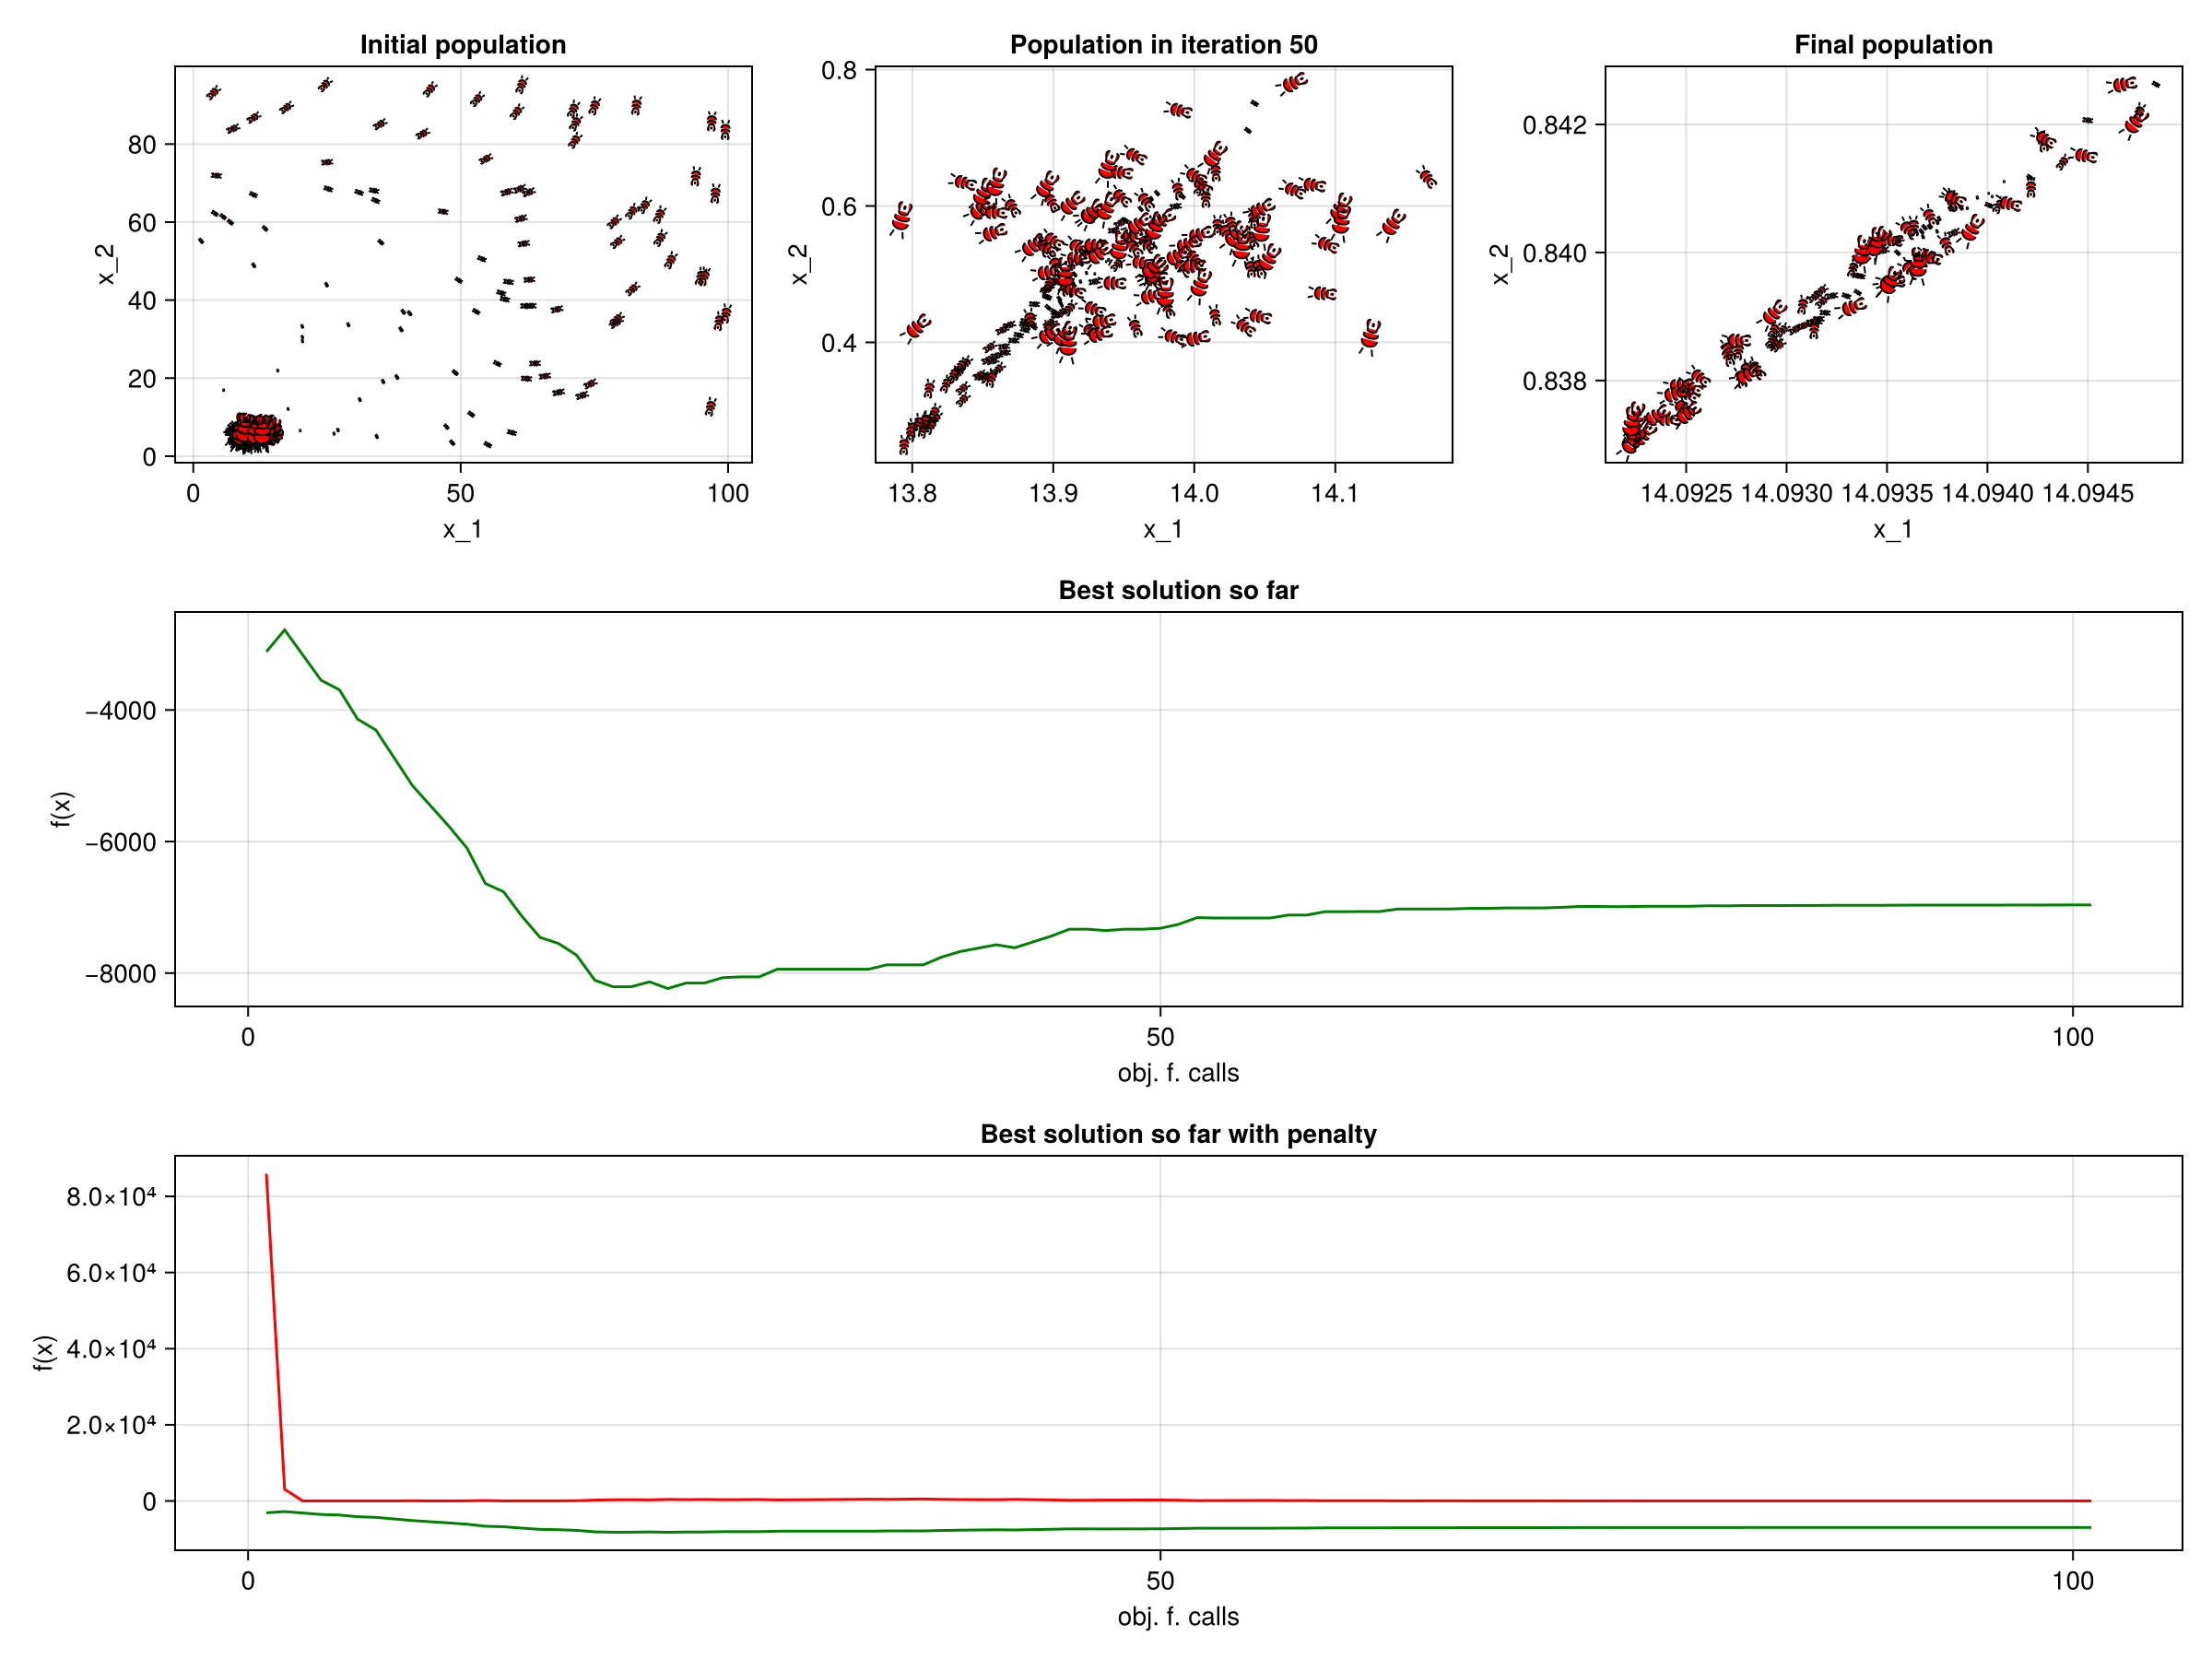

In [4]:
problem_set = simple_problems
problem_id = 1
constraints = problem_set[problem_id].constraints
penatly = EO.p_non_linear   # rg*sum(G(constraints)).^2

pop_size = 100
dimension = problem_set[problem_id].dimension

objective_function  = problem_set[problem_id].objective
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = enclose_arguments(EO.s_tournament, 30, 3)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*100)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints=constraints, penalty=penatly);
EO.compare(solution, problem_set[problem_id])
EO.plot_results(solution)       # can pass x_i= and y_i= to specify which two parameters of the solution should be plotted

### Adaptive penalization, vectorized rg
The objective function is penalized by the vector of constraint violations, multiplied by vector rg(t) which controls the exploration exploitation tradeoff.
Each constraint has separate rg_i(t), which allows for faster convergence, because only the violated constraints are being penalized, not distracting the rest of the optimization.

"here"

top_x: Real[14.09499990475985, 0.8429606036617152]
top_f: -6961.814084661718
violations: [1.8970973769683042e-7, 7.705551752223982e-10, 0.0, 0.0, 0.0, 0.0]
--------------------------------
opt_x: -6961.8138755801
opt_f: [14.095, 0.8429607892154796]


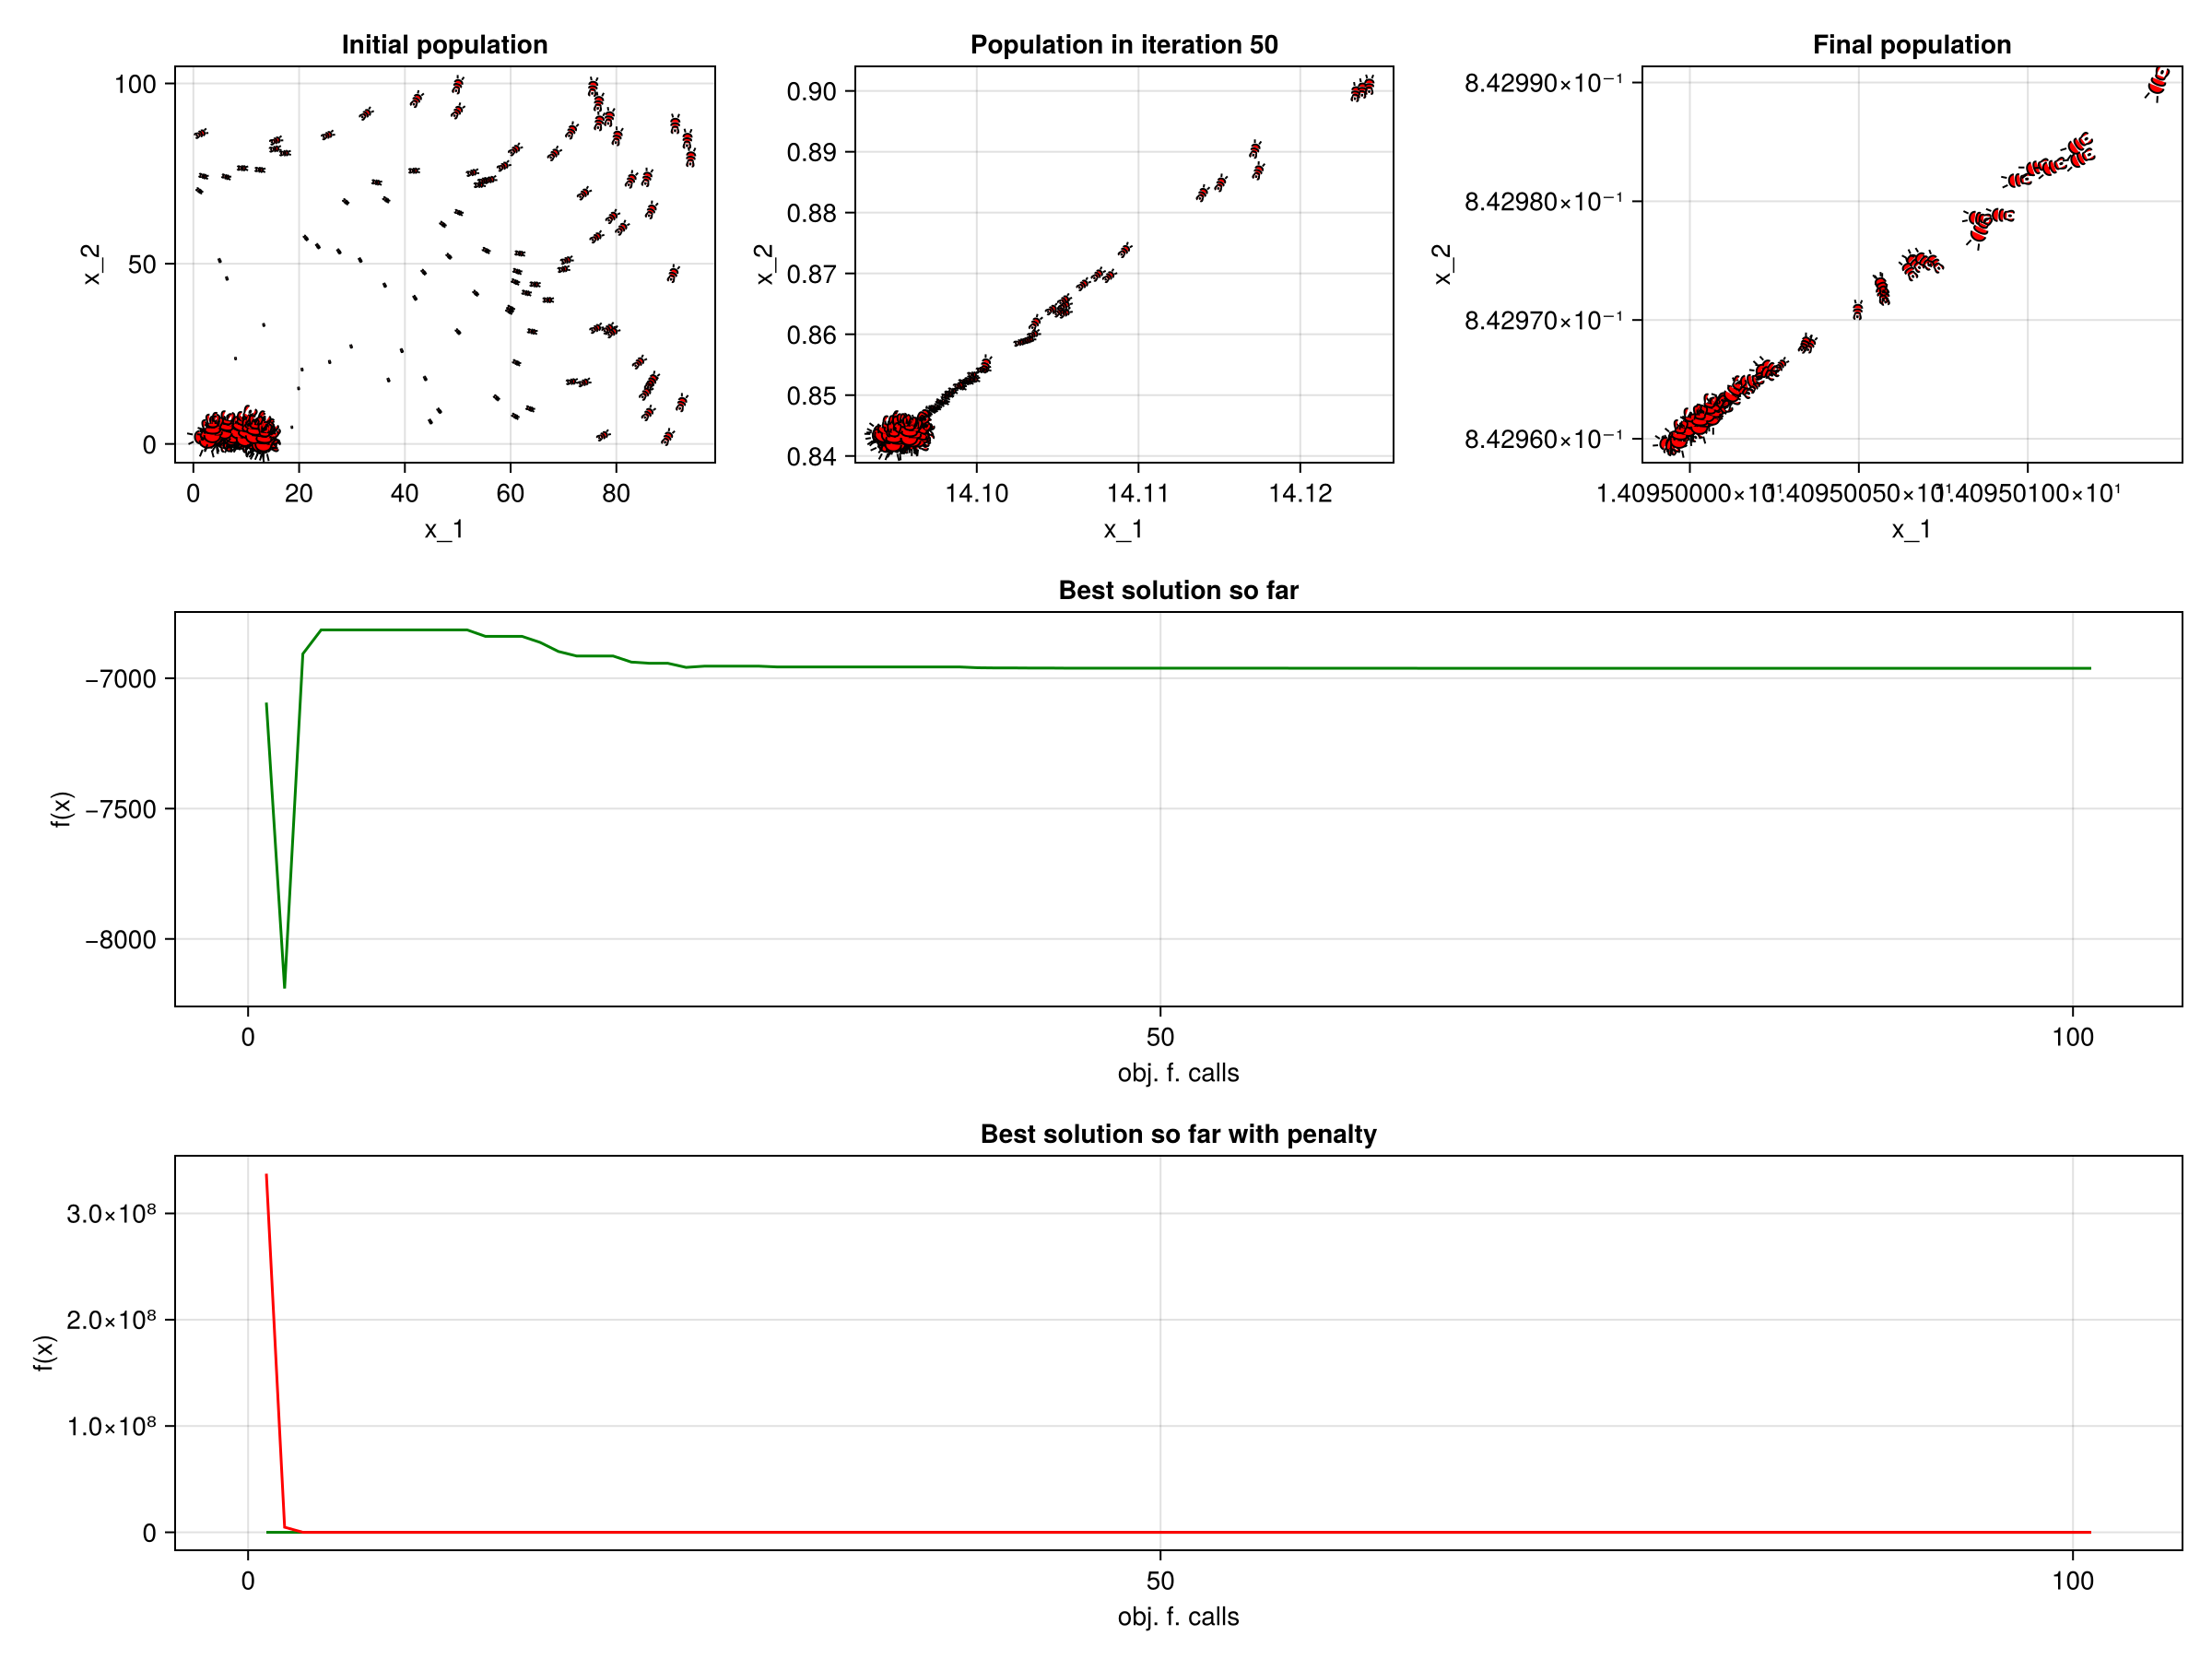

In [5]:
problem_set = simple_problems
problem_id = 1
constraints = problem_set[problem_id].constraints
penatly = EO.p_non_linear   # rg*sum(G(constraints)).^2

pop_size = 100
dimension = problem_set[problem_id].dimension

objective_function  = problem_set[problem_id].objective
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = enclose_arguments(EO.s_tournament, 30, 3)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*100)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination, "vec"; constraints=constraints, penalty=penatly);
EO.compare(solution, problem_set[problem_id])
EO.plot_results(solution)       # can pass x_i= and y_i= to specify which two parameters of the solution should be plotted

### MMOEA
The improvement of MOEA where sum of all constraint violations was one objective. Now each contraint violation is its own objective.

top_x: [14.44261918689946, 8.394107340433942]
top_f: [-1475.5925811902223, 0.0]
violations: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------
opt_x: -6961.8138755801
opt_f: [14.095, 0.8429607892154796]


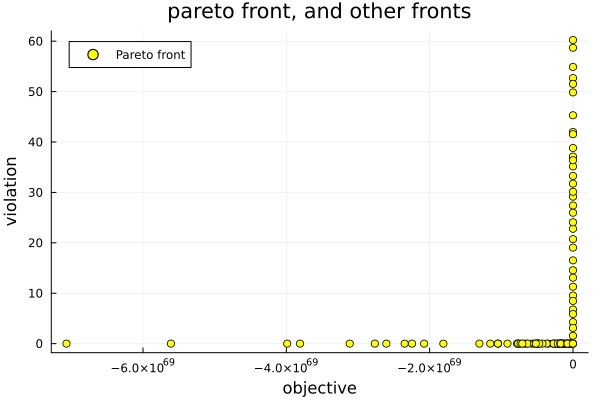

In [6]:
problem_set = simple_problems
problem_id = 1
constraints = problem_set[problem_id].constraints
pop_size = 100
dimension = problem_set[problem_id].dimension

f_pens(x::RealChromosome, constraints::Vector{EO.Constraint}) = sum(EO.Gs(x, constraints))

objectives = Vector{Any}([problem_set[problem_id].objective])
for constraint in constraints
    push!(objectives, constraint)
end

F = typeof(f_pens)
objective_function  = EO.MultiObjFunction{F}(objectives)
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = enclose_arguments(EO.s_tournament, 30, 3)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_NSGA, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*100)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
EO.compare(solution, problem_set[problem_id])
EO.plot_pareto_fronts(solution.pop_history[end])

### Kim Jong Un

Constraint vialation is being handled by imposing the death penalty.

top_x: Real[14.095000693712675, 0.8429621874443008]
top_f: -6961.81230126458
violations: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------
opt_x: -6961.8138755801
opt_f: [14.095, 0.8429607892154796]


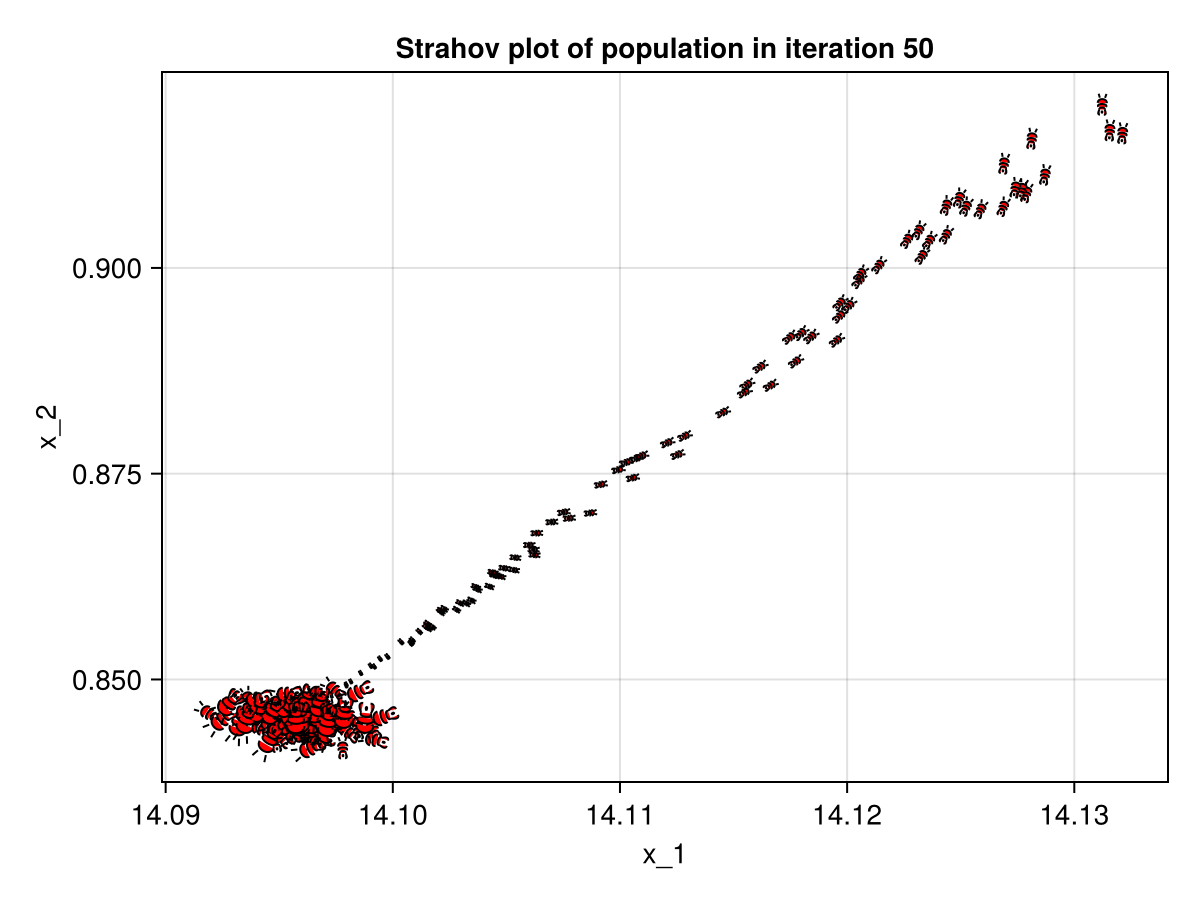

In [23]:
problem_set = simple_problems
problem_id = 1
constraints = problem_set[problem_id].constraints
penatly = (x...) -> EO.death_penalty(x..., Inf)     # real numbers led to huge violations, strict measures had to be carried out

pop_size = 100
dimension = problem_set[problem_id].dimension

objective_function  = problem_set[problem_id].objective
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = enclose_arguments(EO.s_tournament, 30, 3)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*100)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints=constraints, penalty=penatly);
EO.compare(solution, problem_set[problem_id])
EO.strahov_plot(solution.pop_history, 50) # can pass x_i= and y_i= to specify which two parameters of the solution should be plotted

### NSGA-II with modified tournament operator

The best of here implemented multi objective approaches. The violation of constraints is also added into the binary tournament, preffering less violating solutions.
This algorithm mas much denser pareto front around the looked for optimum.

top_x: [14.096060065202444, 0.8452090433117]
top_f: [-6959.285548656512, 0.0]
violations: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------
opt_x: -6961.8138755801
opt_f: [14.095, 0.8429607892154796]


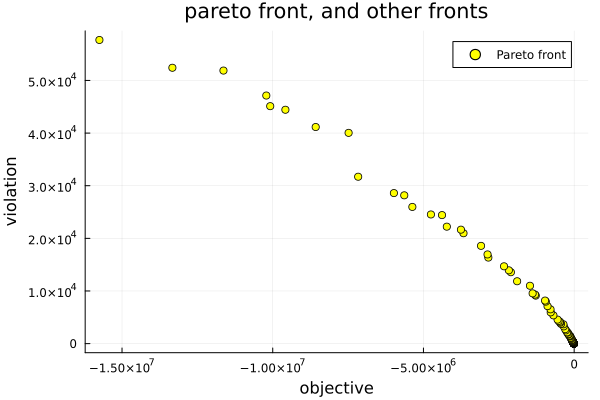

In [27]:
problem_set = simple_problems
problem_id = 1
constraints = problem_set[problem_id].constraints
pop_size = 100
dimension = problem_set[problem_id].dimension

f_pens(x::RealChromosome, constraints::Vector{EO.Constraint}) = sum(EO.Gs(x, constraints))

F = typeof(enclose_arguments(EO.f_weighted_sum, ones(dimension)))
objective_function  = EO.MultiObjFunction{F}([problem_set[problem_id].objective, enclose_arguments(f_pens, constraints)])
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = enclose_arguments(EO.s_tournament, 30, 3)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_cNSGA, pop_size, constraints)
termination         = enclose_argument(iteration_termination, pop_size*100)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
EO.compare(solution, problem_set[problem_id])
EO.plot_pareto_fronts(solution.pop_history[end])

### ASCHEA
* selection breeding feasible solutions with unfeasible
* adaptive penalization
* selection selecting chosen percentage of population to be feasible and fills the rest with the best unfeasibles.
* (the rg is vectorized when the "v" in arguments is present)

"here"

top_x: Real[14.834146771723889, 2.9055073841541237]
top_f: -4882.412258120272
violations: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------
opt_x: -6961.8138755801
opt_f: [14.095, 0.8429607892154796]


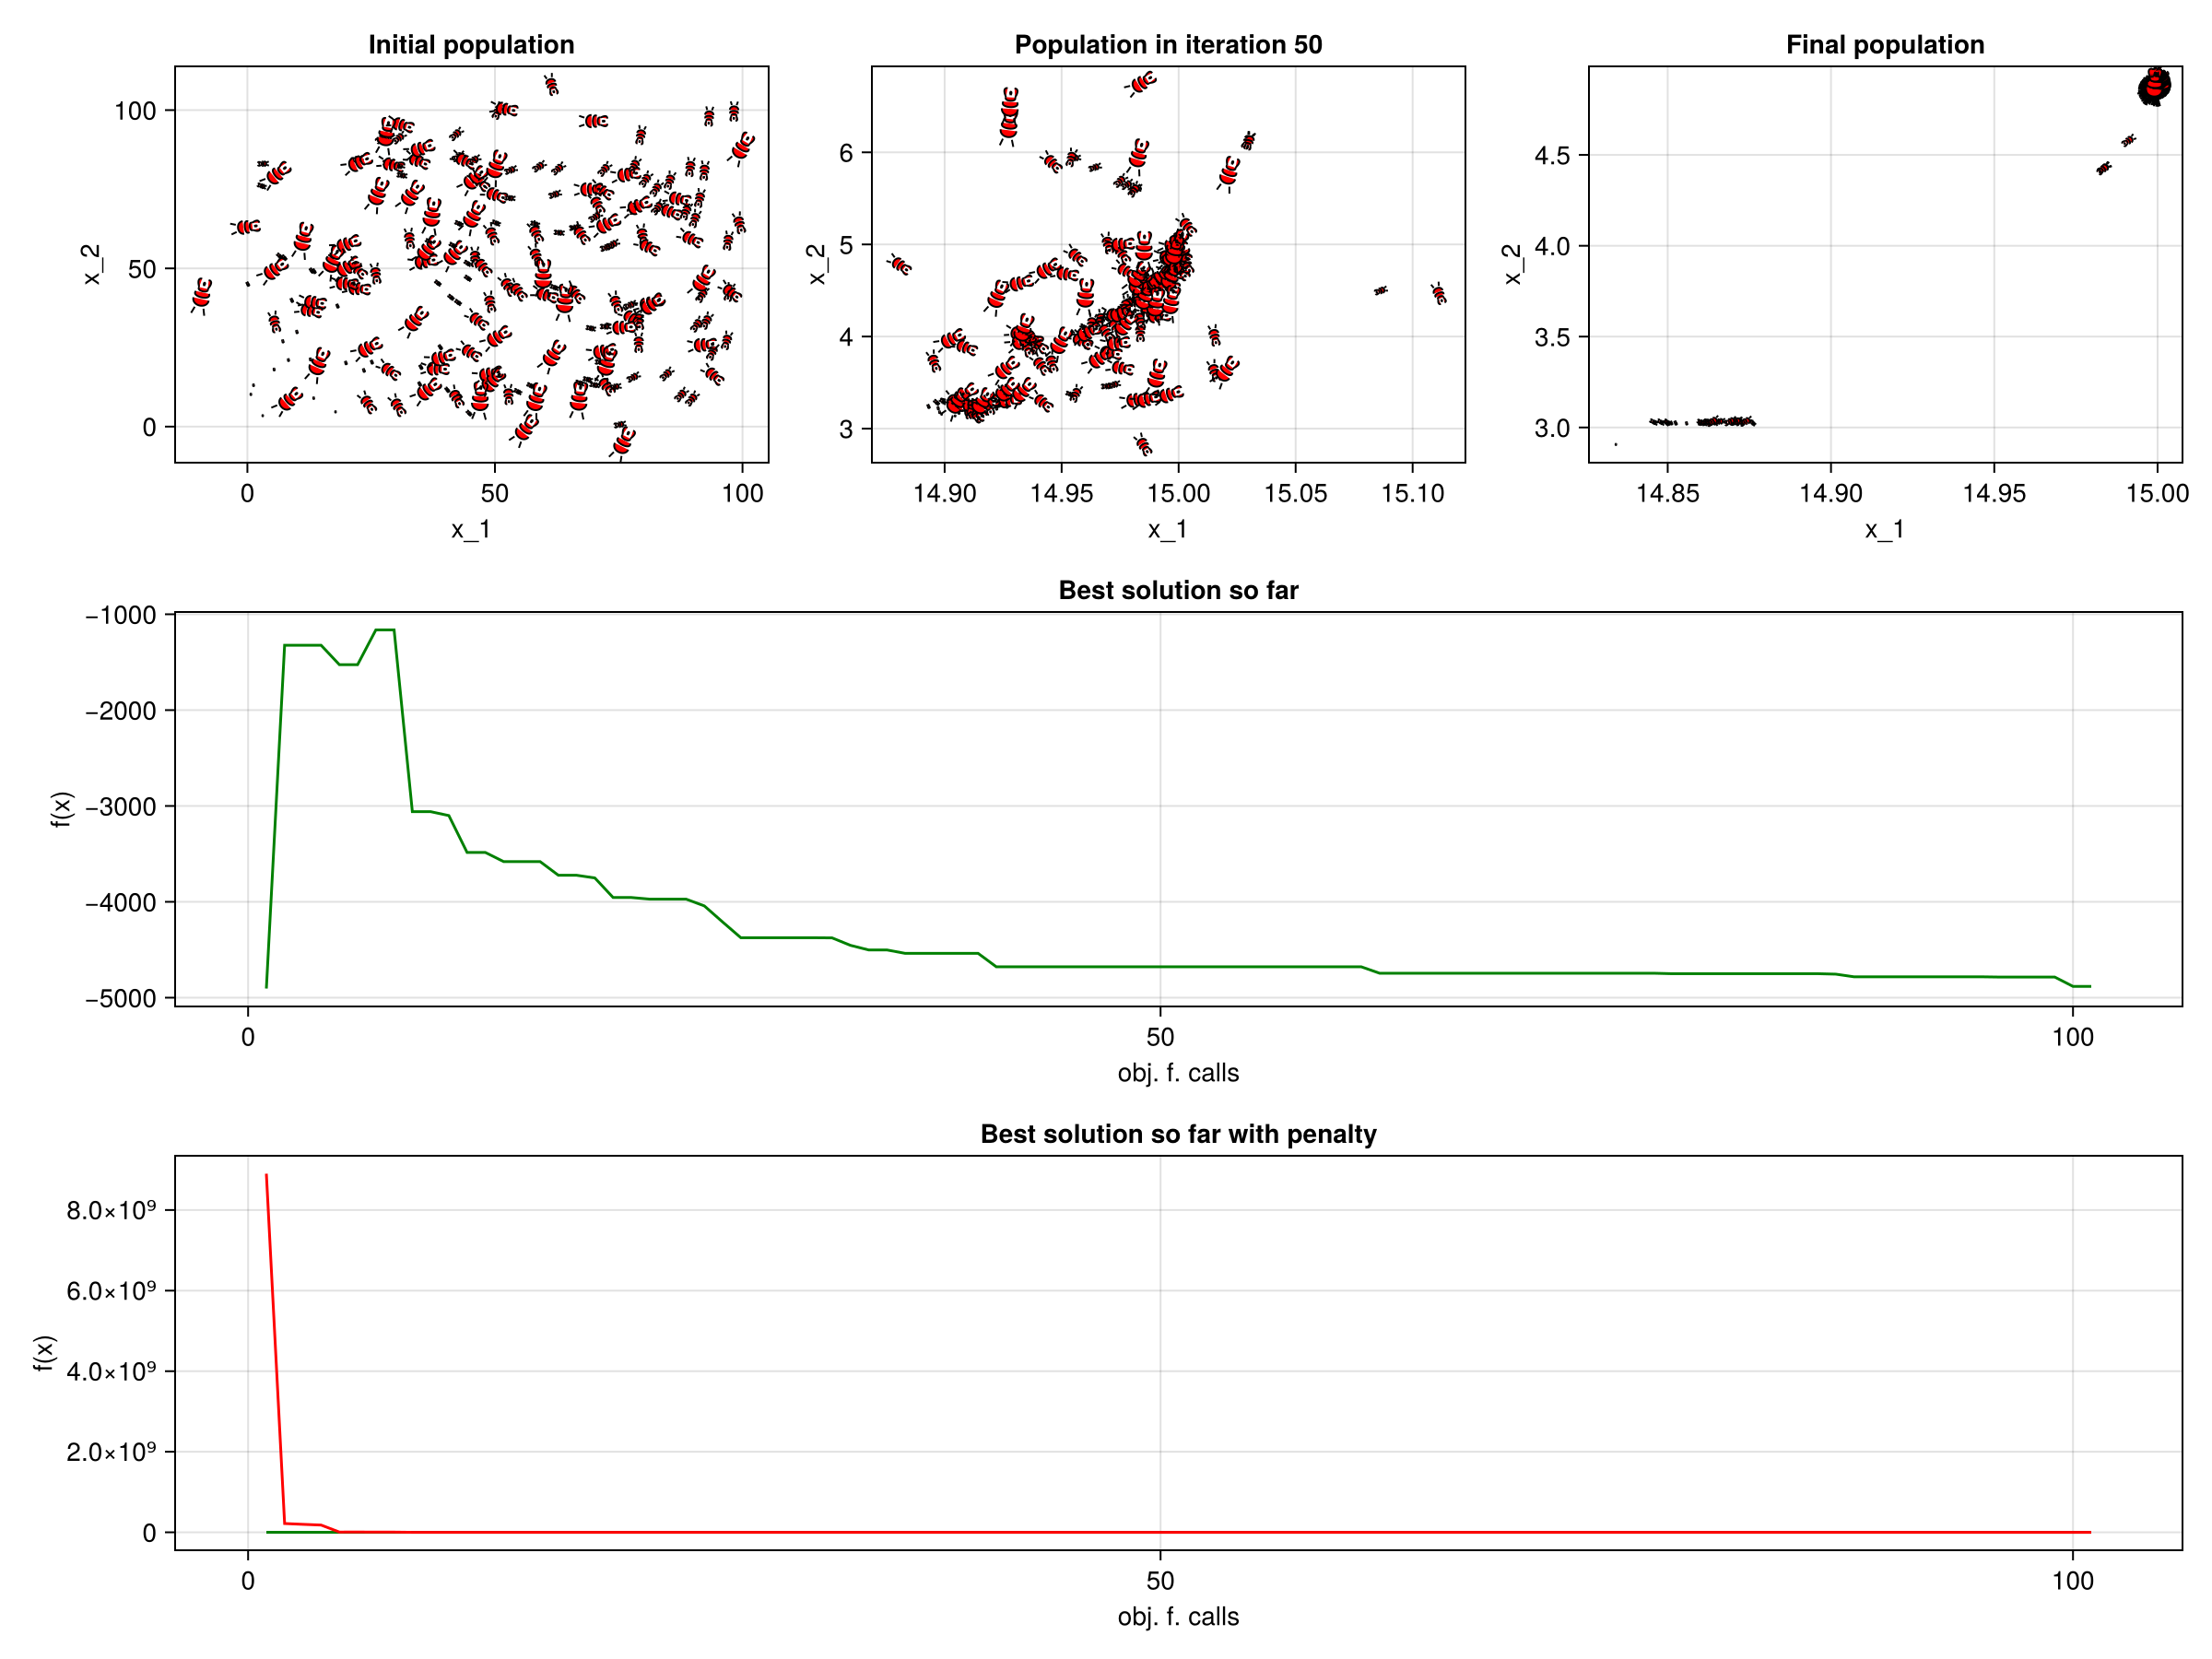

In [9]:
problem_set = simple_problems
problem_id = 1

constraints = problem_set[problem_id].constraints
penatly = EO.p_non_linear   # rg*sum(G(constraints)).^2

pop_size = 100
dimension = problem_set[problem_id].dimension

objective_function  = problem_set[problem_id].objective
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = EO.s_identity
crossover           = enclose_arguments(EO.cr_ASCHEA, pop_size, 1/3, constraints)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_ASCHEA, pop_size, 1/3, constraints)
termination         = enclose_argument(iteration_termination, pop_size*100)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination, "v"; constraints=constraints, penalty=penatly)
EO.compare(solution, problem_set[problem_id])
EO.plot_results(solution)       # can pass x_i= and y_i= to specify which two parameters of the solution should be plotted

## Benchmark results
Interactive graphs of average performance of implemented methods on chosen problems.


In [32]:
# load if u did not use the upper part of the notebook
using EO
simple_problems = EO.setup_simple_problems() # definitions of problems g06,g08,g11,g24
simple_solutions = [p.solution_v for p in simple_problems]
unsimple_problems = EO.setup_unsimple_problems() # definitions of problems g04, g05, g09 and g21.
unsimple_solutions = [p.solution_v for p in unsimple_problems];

### simple problems

rg 100

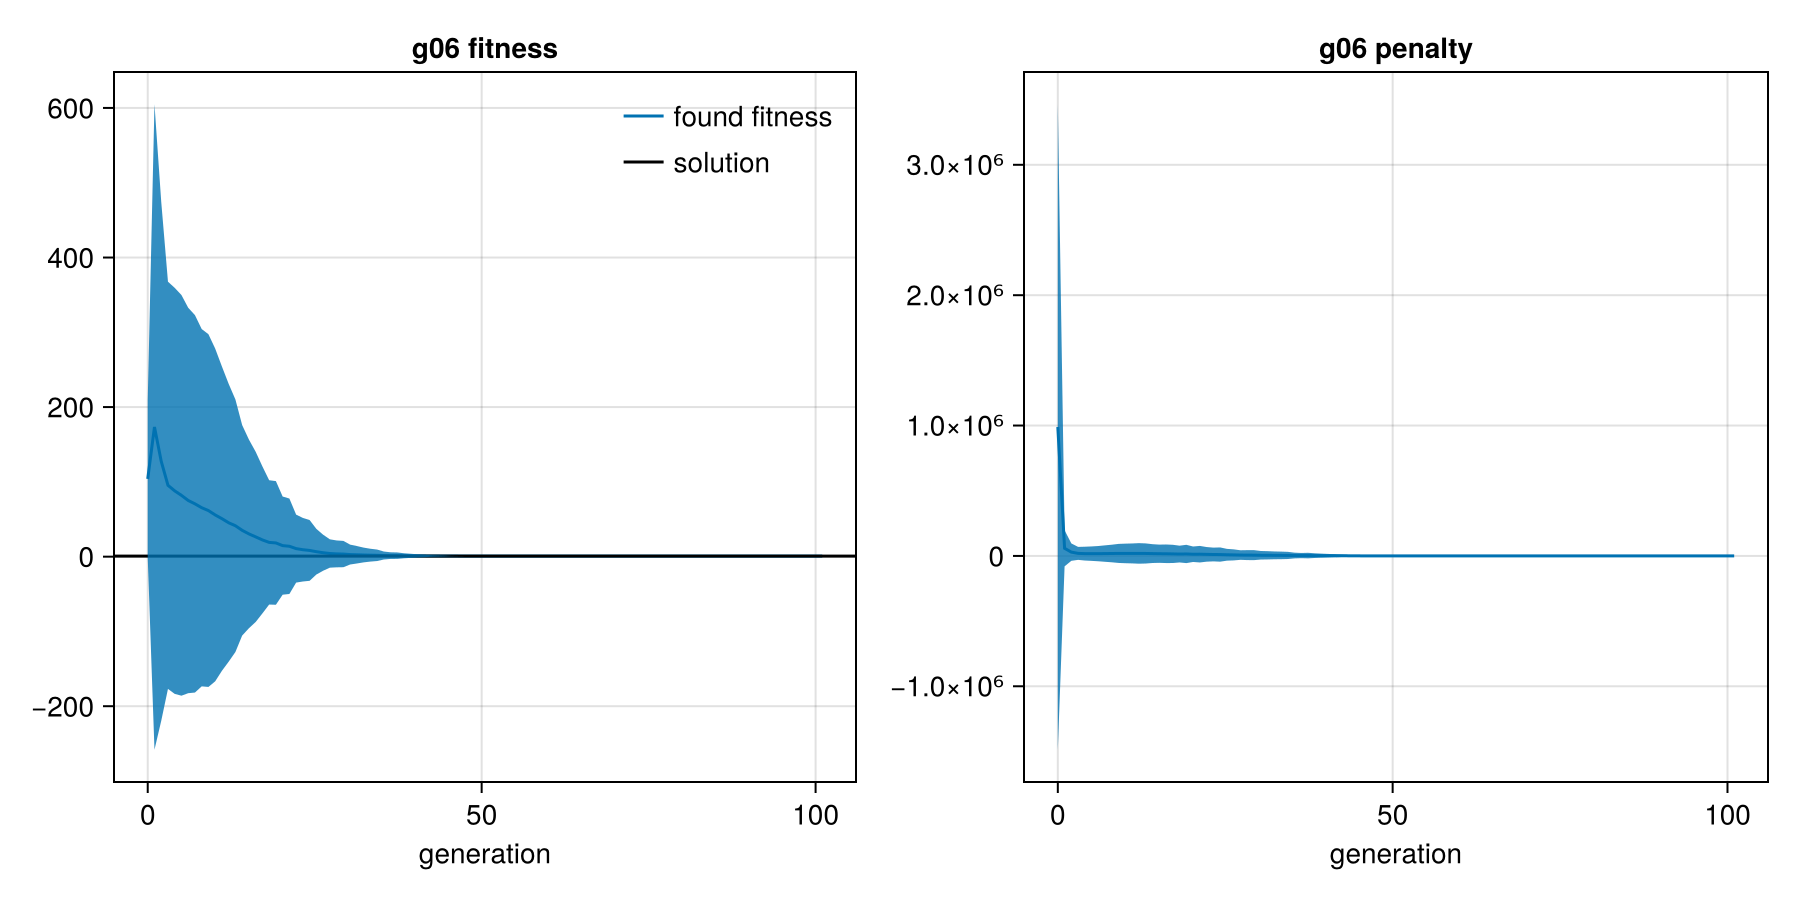

In [11]:
# plot performance of single algorithm on given simple problem
problem_id = 3
EO.plot_easy_benchmark(problem_id, "rg", simple_solutions[problem_id])

NSGA 10000

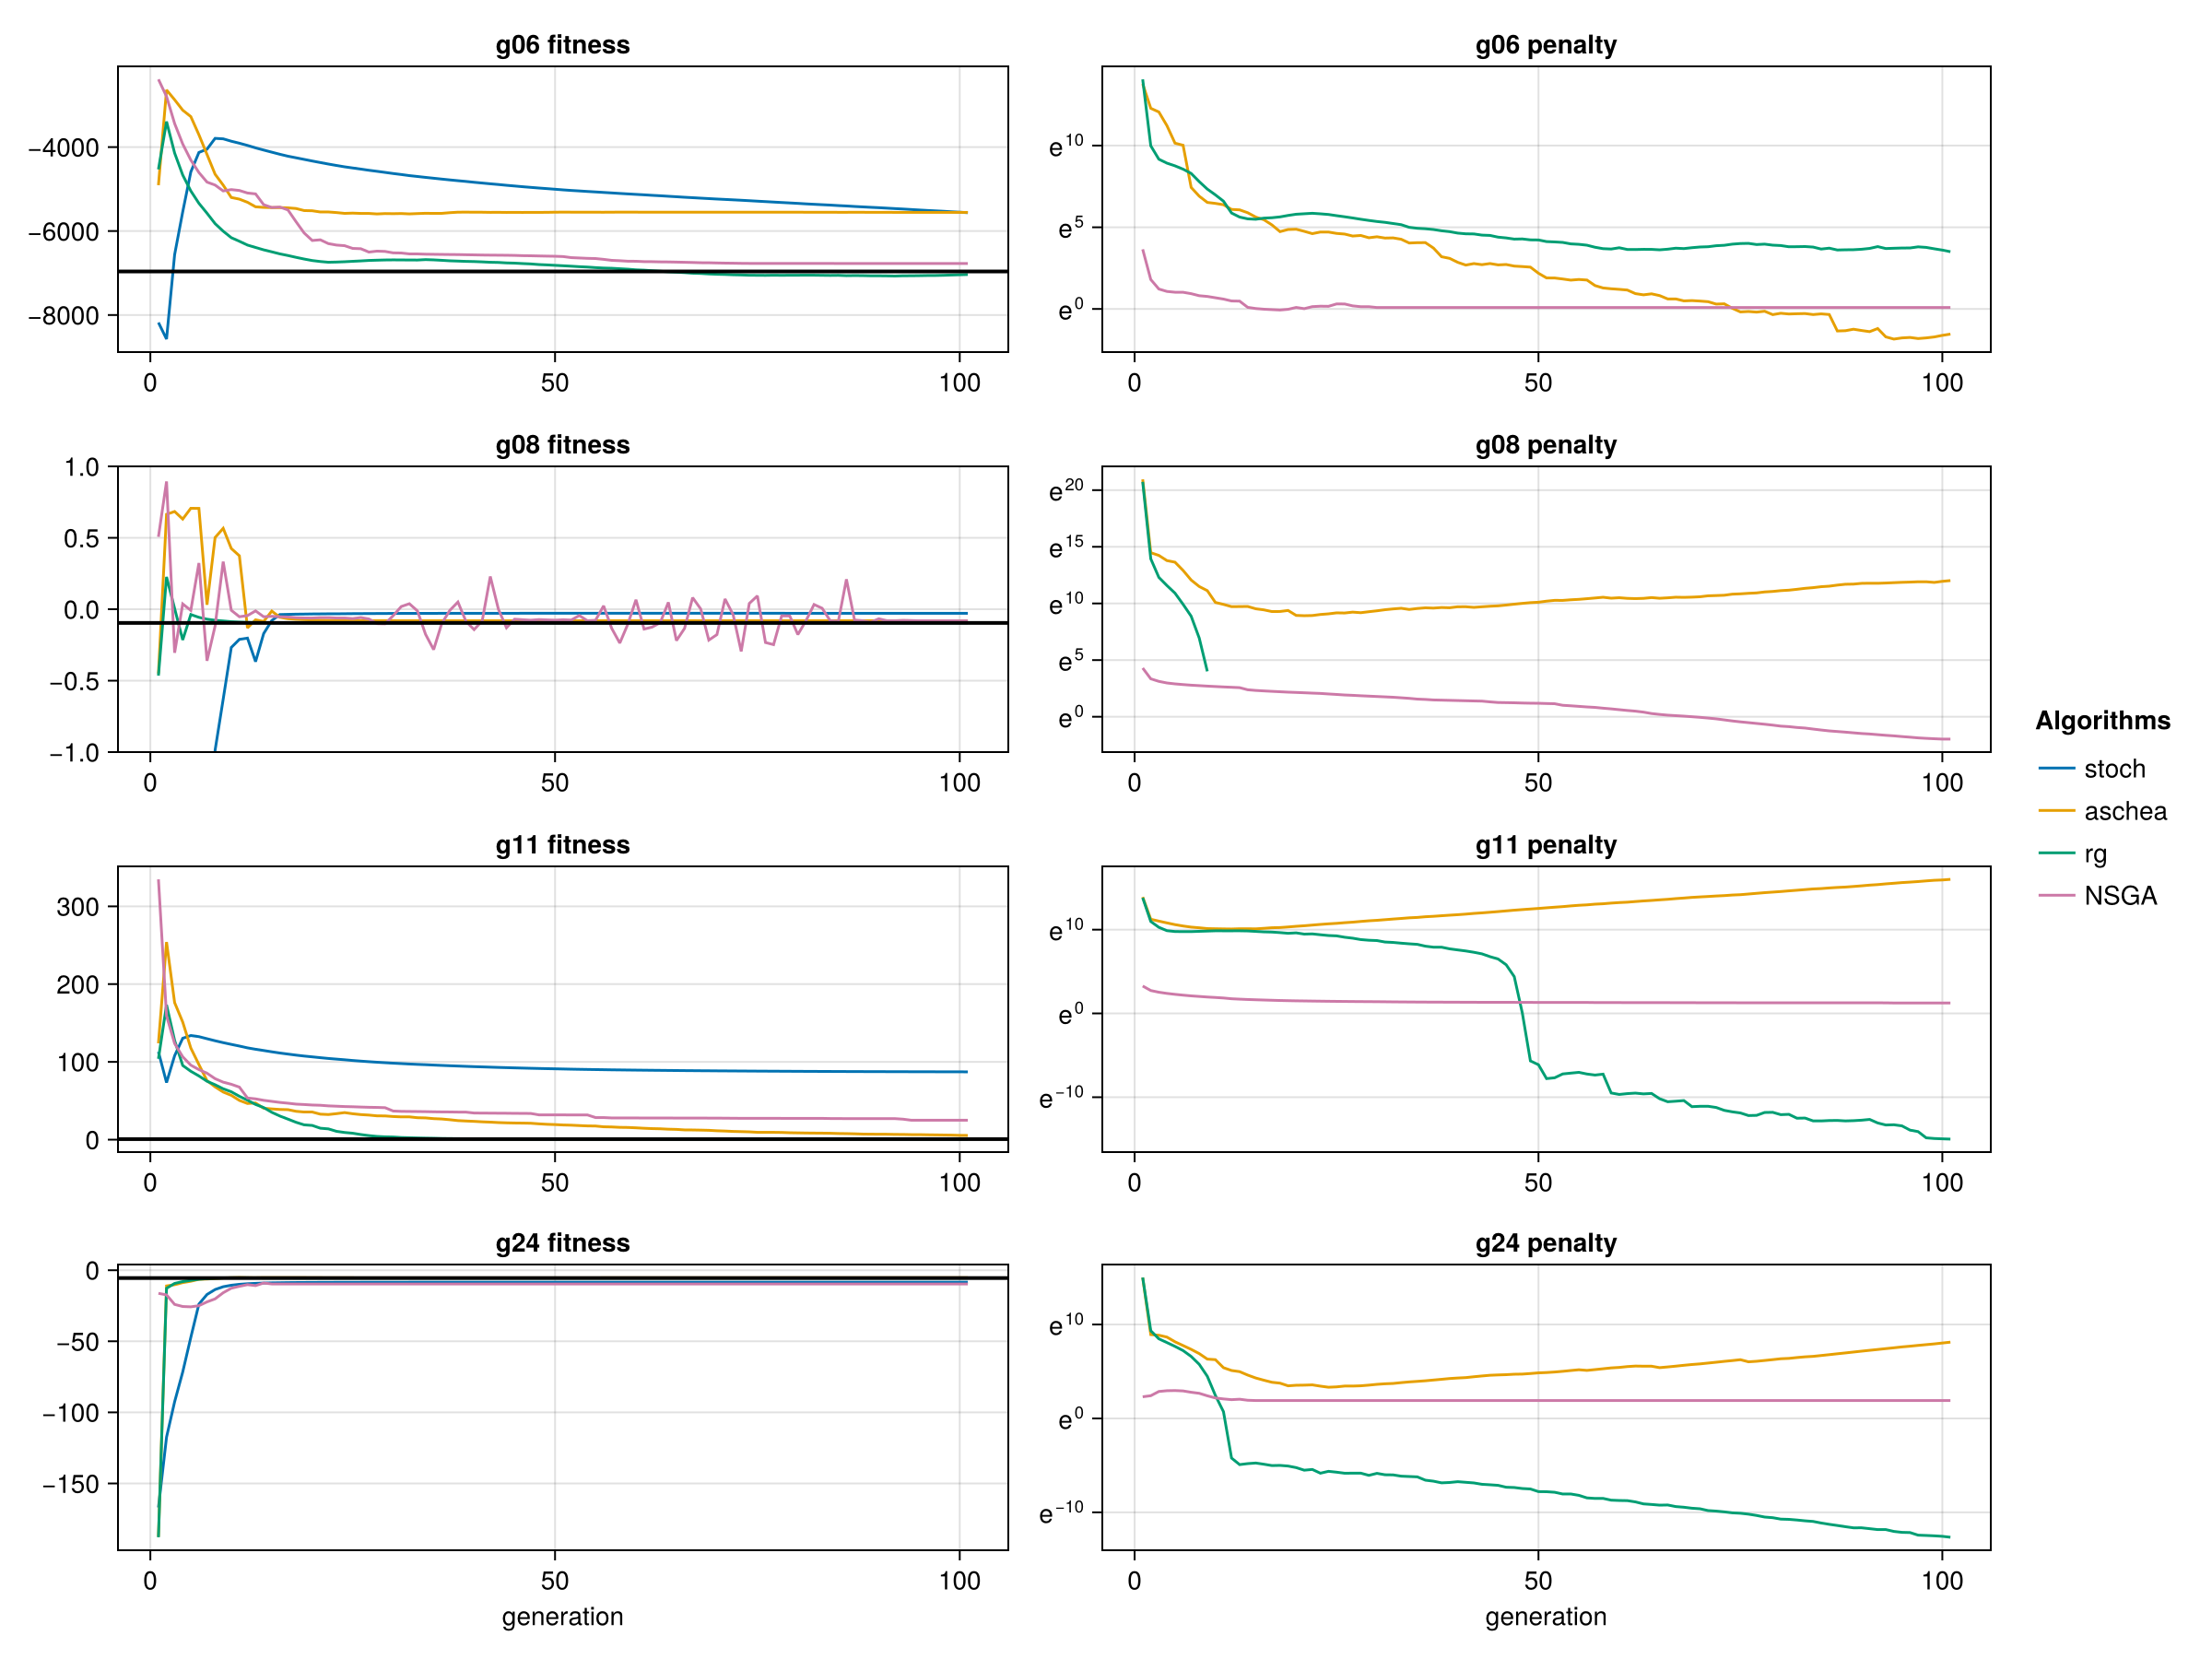

In [38]:
# plot performance of selected algorithms on all simple problems
algs = [#= "stoch", "aschea", "aschea_vec", "kim", "rg", "rg_vec",  =#"MOEA", "MMOEA", "NSGA"]
algs = ["stoch", "aschea", #= "aschea_vec", "kim",  =#"rg", #= "rg_vec",  =##= "MOEA", "MMOEA",  =#"NSGA"]
EO.plot_easy_benchmark(algs, simple_solutions)

### unsimple problems

NSGA 100

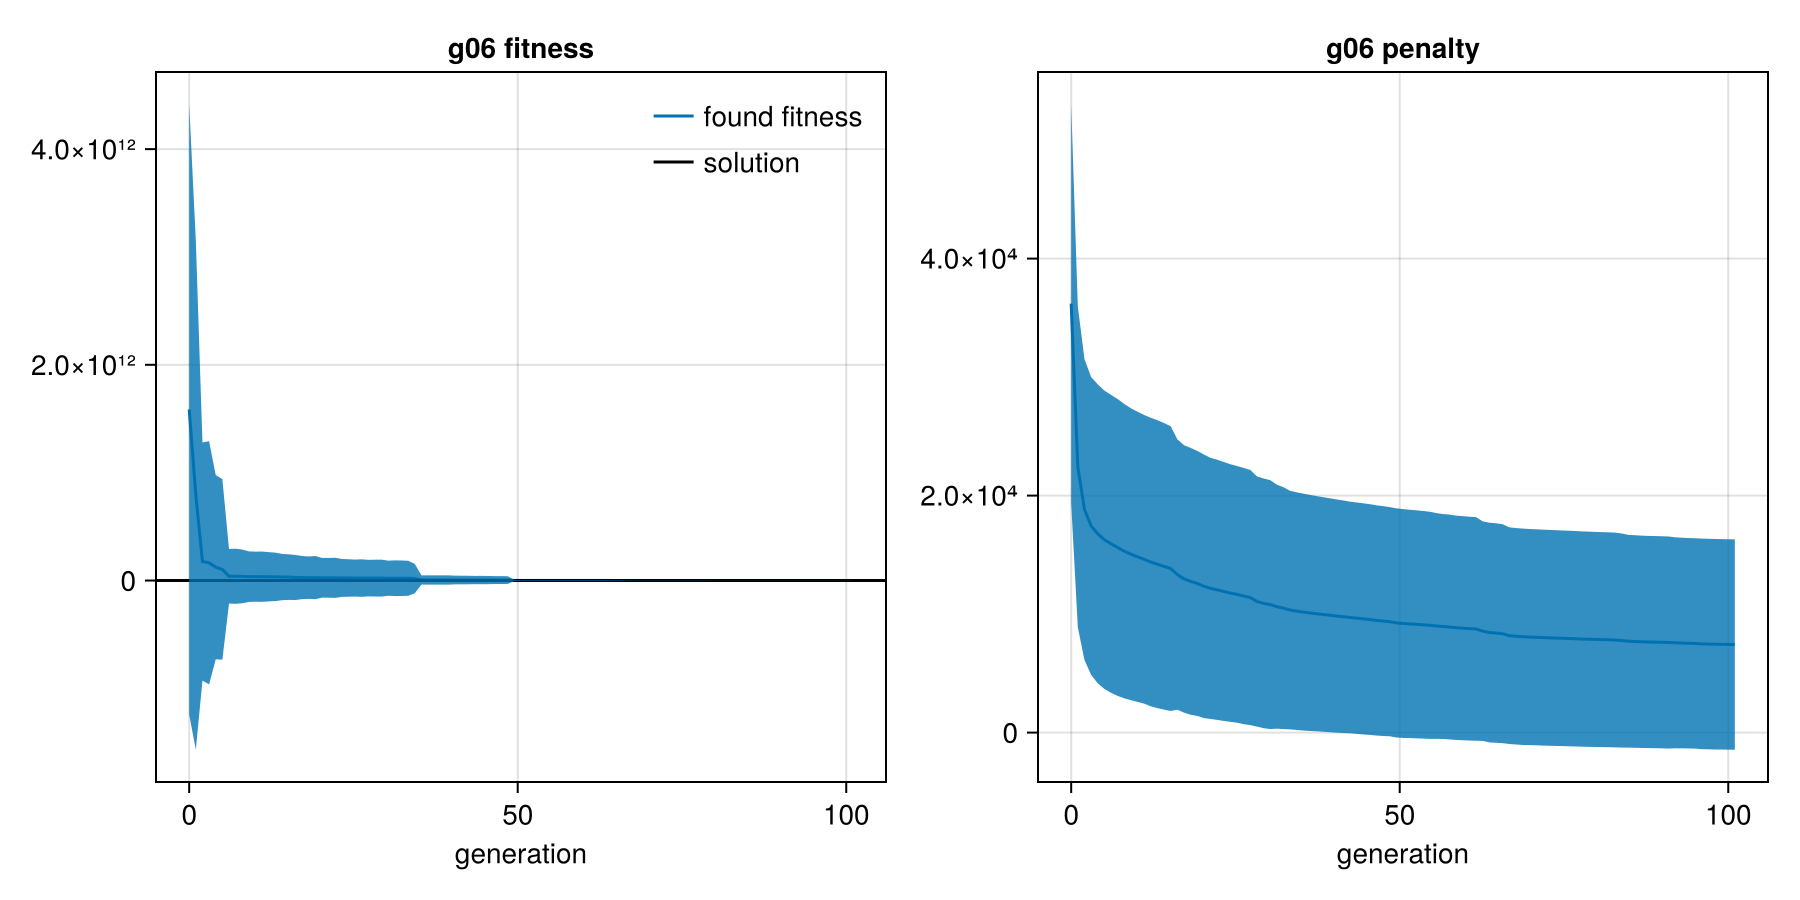

In [35]:
# plot performance of single algorithm on given unsimple problem
problem_id = 3
EO.plot_hard_benchmark(problem_id, "NSGA", unsimple_solutions[problem_id])

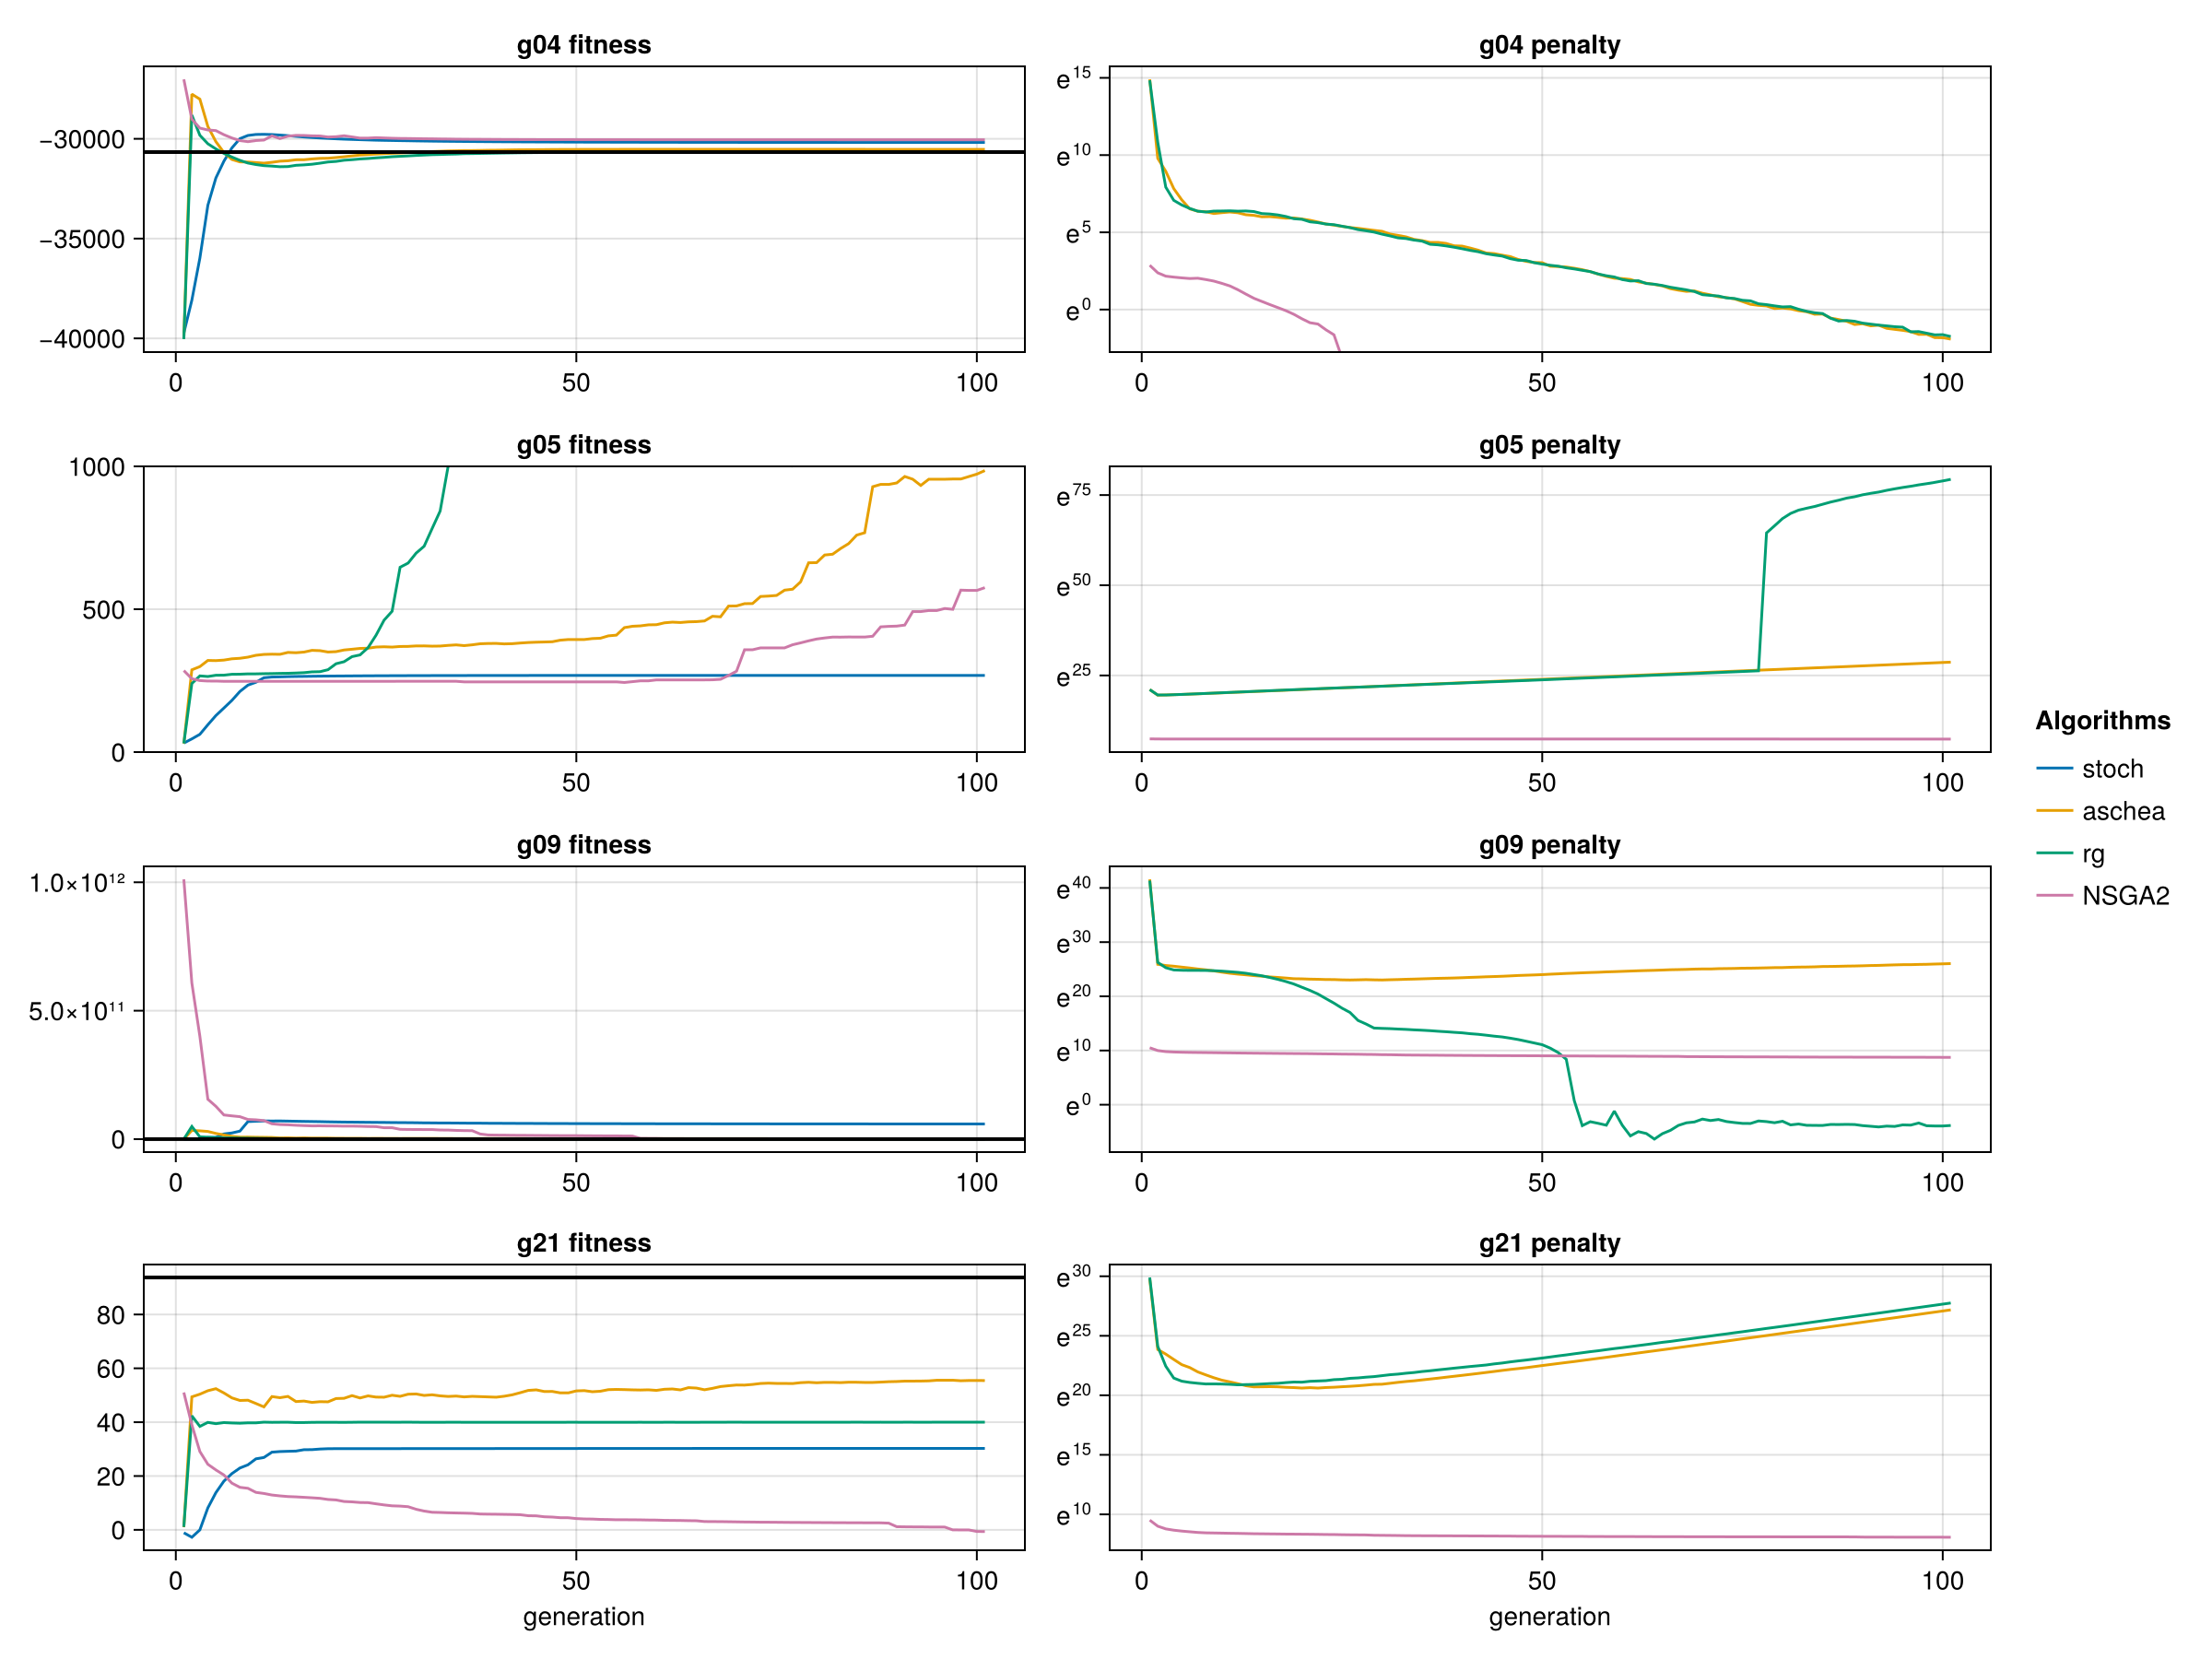

In [36]:
# plot performance of selected algorithms on all unsimple problems
algs = ["stoch", "aschea", #= "aschea_vec", "kim",  =#"rg", #= "rg_vec",  =##= "MOEA", "MMOEA",  =#"NSGA"]
EO.plot_hard_benchmark(algs, unsimple_solutions)

## Conclusions

Vecttorized rg has in same cases worse average performance than scalar rg, however if it succeeds it is more precise.
Penalized fitness seems better in all aspects than stochastic ranking in 2D problems, however stochastic ranking in higher dimensions seems to be more reliable.

Death penalty seems to be useless.

The best multiobjective is NSGA-II with modified binary tournament operator. The second best is MMOEA. And MOEA ist the worst as expected.

I have either badly implemented ASCHEA or it is worse than expected (I expected it to outperform rg in all cases, since it seems just like a more advanced rg). Maybe it would converge closer to the optimal solution, but require more function calls.

## AI acknowledgements
1. The constraints for the problem definitions were rewritten from the pdf into my code by GPT model, which saved at least an hour of work.
2. The crowding distance was implemented by AI, because i was curious how well it can code (line 43-126 in utils.jl).
3. The beatle image for Strahov plot was generated by chat GPT from prompt "svg pth string of betle pls".

## Work done

* the minimal requirements. 
* a comparison with the multi-objective (not only bi-objective) approach. (MMEOA)
* visualizing the achived results.
* a comparison of the algorithms on more complex problems.
* a comparison with the NSGA-II with the modified binary tournament operator.
* a comparison with some other constraint handling approach of your choice.     (Death penalty implemented in the Kin Jong Un algorithm)
* adaptive penalization (scalar rg)
* adaptive penalization (vectorized rg)
* ASCHEA (scalar rg)
* ASCHEA (vector rg)

* **Invention of Strahov plot!**